# Simple Starter Notebook for;
## UmojaHack Africa 2021 #2: Sendy - Delivery Rider Response Challenge by UmojaHack Africa

Can you predict who is the best delivery rider for an order placed via logistics company Sendy?

![Umoja Hack](https://zindpublic.blob.core.windows.net/public/uploads/competition/image/152/thumb_c5ec4e2a-e000-4176-a93c-dd1143c2b60f.png)

The objective of this challenge is to create a machine learning model that will predict whether a rider will accept, decline or ignore an order sent to them.

In [58]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [59]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
riders = pd.read_csv('Riders.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [60]:
# check data shapes
#train.shape, test.shape, riders.shape, ss.shape

In [61]:
# Preview train
#train.head()

In [62]:
# Preview riders
#riders.head()

In [63]:
# Merge rider dataset to train and test sets
train = train.merge(riders, how = 'left', left_on='rider_id', right_on='Rider ID')
test = test.merge(riders, how = 'left', left_on='rider_id', right_on='Rider ID')

# Preview merged dataframe
train

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,...,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,30153,11,10.00,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,20884,68,24.13,229
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,33143,273,24.92,123
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,96531,168,23.76,175
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,103546,95,24.53,42
5,ID_QG327RXJZ7,2374,22,5,08:12:54,75647,Business,0,1,Bike,...,-17.242244,-42.813452,-17.233333,-42.794423,-17.244687,0,66125,182,23.96,57
6,ID_MRC2RIJGUA,7071,14,4,09:11:35,85261,Business,0,1,Bike,...,-17.277562,-42.805966,-17.287565,-42.802569,-17.252329,0,66033,124,10.00,4
7,ID_HDUCBCXLC1,50041,3,3,15:09:26,151271,Business,0,1,Bike,...,-17.312222,-42.843415,-17.318960,-42.855423,-17.292512,0,45701,56,10.00,12
8,ID_XZC11Y3PJL,46731,18,5,15:01:55,593630,Business,0,2,Bike,...,-17.289053,-42.781209,-17.297432,-42.737458,-17.278413,0,117622,40,24.54,87
9,ID_T0VWF98B3X,2413,28,6,08:12:49,59363,Business,0,2,Bike,...,-17.279260,-42.831152,-17.276845,-42.968853,-17.283623,0,40066,0,23.78,100


In [64]:
#train.describe()

In [65]:
#train.info()

In [66]:
#data = train.drop(['ID', 'order_id', 'rider_id', 'Rider ID', 'dispatch_time', 'client_id','dispatch_time', 'dispatch_day'], axis=1)
#data.corr(method='spearman')

In [67]:
#train['rider_id']=train['Rider ID']

In [68]:
#df_0=train.query('rider_id == 33143')
#df_1=train.query('target== 1')
#df_2=train.query('target== 2')

In [69]:
#len(test)
#df_0

In [70]:
#import matplotlib.pyplot as plt
#x = list(df_0['target'])
#plt.hist(x, range = (0, 4), bins = 8, color = 'yellow',
#            edgecolor = 'red')
#plt.xlabel('valeurs')
#plt.ylabel('nombres')
#plt.title('Exemple d\' histogramme simple')

In [71]:
#df_1.describe()

In [72]:
#df_2.describe()

dispatch_time : Morning, afternoon, evening et ensuite faire un codage one hot
supprimer en plus des Id, dispatch_day, Number of Ratings
penser a la colonne vendor_type

In [73]:
#train['eval']=['bad' if (Average Partner Rating <16 and )]

In [74]:
train['dispatch_moment']=['morning' if (time<='12:00:00' and time>='05:00:00') else 'afternoon' if (time<='14:59:00' and time>'12:00:00') else 'night' for time in train['dispatch_time']]
test['dispatch_moment']=['morning' if (time<='12:00:00' and time>='05:00:00') else 'afternoon' if (time<='14:59:00' and time>'12:00:00') else 'night' for time in test['dispatch_time']]

In [75]:
#df_0=train.query('target == 0')

In [76]:
#import matplotlib.pyplot as plt
#x = list(df_0['dispatch_day'])
#plt.hist(x, range = (0, 8), bins = 8, color = 'yellow',
#            edgecolor = 'red')
#plt.xlabel('valeurs')
#plt.ylabel('nombres')
#plt.title('Exemple d\' histogramme simple')

In [77]:
#df_1=train.query('target == 1')
#import matplotlib.pyplot as plt
#x = list(df_1['dispatch_day'])
#plt.hist(x, range = (0, 8), bins = 8, color = 'yellow',
#            edgecolor = 'red')
#plt.xlabel('valeurs')
#plt.ylabel('nombres')
#plt.title('Exemple d\' histogramme simple')

In [78]:
#df_2=train.query('target == 2')
#import matplotlib.pyplot as plt
#x = list(df_2['dispatch_day'])
#plt.hist(x, range = (0, 8), bins = 8, color = 'yellow',
#            edgecolor = 'red')
#plt.xlabel('valeurs')
#plt.ylabel('nombres')
#plt.title('Exemple d\' histogramme simple')

In [79]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [80]:
#for training dataset
train['distance_pickup_dropoff']=[abs(distance(train.pickup_lat[i], train.pickup_long[i], train.drop_off_lat[i], train.drop_off_long[i])) for i in range(179867)]
train['distance_pickup_rider'] = [abs(distance(train.pickup_lat[i], train.pickup_long[i], train.rider_lat[i], train.rider_long[i])) for i in range(179867)]
train['distance_dropoff_rider'] = [abs(distance(train.rider_lat[i], train.rider_long[i], train.drop_off_lat[i], train.drop_off_long[i])) for i in range(179867)]
train['total_distance']=train['distance_pickup_dropoff']+train['distance_pickup_rider']

In [81]:
train['ratio_prix_distance']=train['rider_amount']/train['total_distance']

In [82]:
train['box_option_ok']=[0 if((train.order_carrier_type[i]== 1 and train.rider_carrier_type[i] != 1) or (train.rider_carrier_type[i] == 1 and train.order_carrier_type[i] == 0)) else 1 for i in range(179867)]

In [83]:
train['license_option_ok']=[0 if (train.order_license_status[i] == 0 and train.rider_license_status[i] != 1) else 0 for i in range(179867)]

In [84]:
df=train.query('box_option_ok == 0 | license_option_ok == 0 ')

In [85]:
df

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,Average Partner Rating,Number of Ratings,dispatch_moment,distance_pickup_dropoff,distance_pickup_rider,distance_dropoff_rider,total_distance,ratio_prix_distance,box_option_ok,license_option_ok
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,...,10.00,1,morning,8.963948,1.085219,9.989236,10.049167,107.471592,1,0
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,24.13,229,afternoon,8.156401,0.245052,8.337342,8.401452,86.889738,1,0
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,24.92,123,morning,3.368663,1.147401,4.489327,4.516064,108.501560,1,0
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,23.76,175,afternoon,2.864093,0.346404,2.874838,3.210497,158.853905,1,0
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,24.53,42,night,0.966170,0.593190,1.052522,1.559360,256.515527,1,0
5,ID_QG327RXJZ7,2374,22,5,08:12:54,75647,Business,0,1,Bike,...,23.96,57,morning,1.435248,1.993773,3.259122,3.429022,116.651351,1,0
6,ID_MRC2RIJGUA,7071,14,4,09:11:35,85261,Business,0,1,Bike,...,10.00,4,morning,1.801573,0.885877,1.599953,2.687450,148.839969,1,0
7,ID_HDUCBCXLC1,50041,3,3,15:09:26,151271,Business,0,1,Bike,...,10.00,12,night,1.575835,0.348253,1.343276,1.924088,218.285228,1,0
8,ID_XZC11Y3PJL,46731,18,5,15:01:55,593630,Business,0,2,Bike,...,24.54,87,night,3.173129,0.553109,2.722886,3.726238,112.714214,1,0
9,ID_T0VWF98B3X,2413,28,6,08:12:49,59363,Business,0,2,Bike,...,23.78,100,morning,9.520411,0.433919,9.932991,9.954329,80.367041,1,0


Text(0.5, 1.0, "Exemple d' histogramme simple")

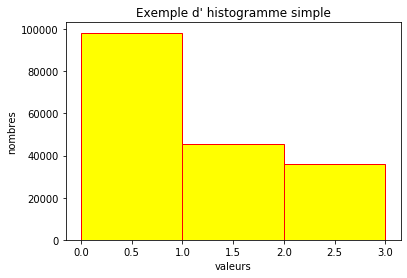

In [86]:
import matplotlib.pyplot as plt
x = list(df['target'])
plt.hist(x, range = (0, 3), bins = 3, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Exemple d\' histogramme simple')

In [87]:
train['abe']=['del' if (train.target[i] == 2 and (train.box_option_ok[i] == 0 or train.license_option_ok[i] == 0)) else 'no_del' for i in range (179867)]

In [88]:
train.drop(train[train['abe'] == 'del'].index, inplace=True)
#train.drop(train[train['license_option_ok'] == 0 ].index, inplace=True)

In [89]:
train

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,Number of Ratings,dispatch_moment,distance_pickup_dropoff,distance_pickup_rider,distance_dropoff_rider,total_distance,ratio_prix_distance,box_option_ok,license_option_ok,abe
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,...,1,morning,8.963948,1.085219,9.989236,10.049167,107.471592,1,0,no_del
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,123,morning,3.368663,1.147401,4.489327,4.516064,108.501560,1,0,no_del
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,42,night,0.966170,0.593190,1.052522,1.559360,256.515527,1,0,no_del
5,ID_QG327RXJZ7,2374,22,5,08:12:54,75647,Business,0,1,Bike,...,57,morning,1.435248,1.993773,3.259122,3.429022,116.651351,1,0,no_del
6,ID_MRC2RIJGUA,7071,14,4,09:11:35,85261,Business,0,1,Bike,...,4,morning,1.801573,0.885877,1.599953,2.687450,148.839969,1,0,no_del
7,ID_HDUCBCXLC1,50041,3,3,15:09:26,151271,Business,0,1,Bike,...,12,night,1.575835,0.348253,1.343276,1.924088,218.285228,1,0,no_del
8,ID_XZC11Y3PJL,46731,18,5,15:01:55,593630,Business,0,2,Bike,...,87,night,3.173129,0.553109,2.722886,3.726238,112.714214,1,0,no_del
9,ID_T0VWF98B3X,2413,28,6,08:12:49,59363,Business,0,2,Bike,...,100,morning,9.520411,0.433919,9.932991,9.954329,80.367041,1,0,no_del
10,ID_NMVQI8W123,64286,20,5,20:11:59,75647,Business,0,1,Bike,...,6,night,1.157593,1.764762,1.716524,2.922355,153.985382,1,0,no_del
11,ID_O8WRHSV3JZ,47673,28,5,15:02:39,593630,Business,1,2,Bike,...,70,night,1.762690,0.393303,2.109276,2.155993,185.529320,1,0,no_del


In [90]:
#for testing dataset
test['distance_pickup_dropoff']=[abs(distance(test.pickup_lat[i], test.pickup_long[i], test.drop_off_lat[i], test.drop_off_long[i])) for i in range(76791)]
test['distance_pickup_rider'] = [abs(distance(test.pickup_lat[i], test.pickup_long[i], test.rider_lat[i], test.rider_long[i])) for i in range(76791)]
test['distance_dropoff_rider'] = [abs(distance(test.rider_lat[i], test.rider_long[i], test.drop_off_lat[i], test.drop_off_long[i])) for i in range(76791)]
test['total_distance']=test['distance_pickup_dropoff']+test['distance_pickup_rider']

In [91]:
test['ratio_prix_distance']=test['rider_amount']/test['total_distance']

In [92]:
test['box_option_ok']=[0 if((test.order_carrier_type[i]== 1 and test.rider_carrier_type[i] != 1) or (test.rider_carrier_type[i] == 1 and test.order_carrier_type[i] == 0)) else 1 for i in range(76791)]

In [93]:
test['license_option_ok']=[0 if (test.order_license_status[i] == 0 and test.rider_license_status[i] != 1) else 1 for i in range(76791)]

In [94]:
#test

In [95]:
#PCA
#col=['order_carrier_type', 'rider_carrier_type', 'total_distance', 'rider_amount', 'target', 'ratio_prix_distance']
#train[col].query('target == 2')

In [96]:
# One hot encoding
train = pd.get_dummies(train, columns=['client_type', 'dispatch_moment'])#, 'box_option_ok', 'license_option_ok'])
test = pd.get_dummies(test, columns=['client_type', 'dispatch_moment'])#, 'box_option_ok', 'license_option_ok'])

In [97]:
#test.to_csv('new_test.csv', index = False)

In [98]:
#data = train.drop(['ID', 'order_id', 'rider_id', 'Rider ID', 'dispatch_time', 'client_id', 'dispatch_day', 'vendor_type', 'rider_long','rider_lat', 'pickup_long', 'pickup_lat', 'drop_off_long', 'drop_off_lat', 'rider_carrier_type', 'order_carrier_type', 'rider_license_status', 'order_license_status'], axis=1)
#data.columns

In [99]:
#data = data.drop(['distance_pickup_dropoff', 'distance_pickup_rider', 'distance_dropoff_rider'], axis=1)
#data.columns

In [100]:
#len(list(data))

In [101]:
#data.corr(method='spearman')['target']

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Split data
#main_cols = train.columns.difference(['ID', 'order_id', 'rider_id', 'Rider ID', 'target', 'dispatch_time',	'client_id', 'Number of Ratings', 'vendor_type']).tolist()
#main_cols = train.columns.difference(['ID', 'order_id', 'rider_id', 'Rider ID', 'dispatch_time', 'client_id', 'dispatch_day', 'vendor_type', 'rider_long','rider_lat', 'pickup_long', 'pickup_lat', 'drop_off_long', 'drop_off_lat', 'rider_carrier_type', 'order_carrier_type', 'rider_license_status', 'order_license_status','distance_pickup_dropoff', 'distance_pickup_rider', 'distance_dropoff_rider', 'target', 'total_distance', 'rider_amount', 'box_option_ok', 'license_option_ok']).tolist()
main_cols = train.columns.difference(['ID', 'order_id', 'rider_id', 'Rider ID', 'dispatch_time', 'client_id', 'dispatch_day', 'vendor_type','distance_pickup_dropoff', 'distance_pickup_rider', 'distance_dropoff_rider', 'target', 'box_option_ok', 'license_option_ok', 'abe']).tolist()

main_cols

['Active Rider Age',
 'Average Partner Rating',
 'Number of Ratings',
 'client_type_Business',
 'client_type_Personal',
 'dispatch_day_of_week',
 'dispatch_moment_afternoon',
 'dispatch_moment_morning',
 'dispatch_moment_night',
 'drop_off_lat',
 'drop_off_long',
 'order_carrier_type',
 'order_license_status',
 'pickup_lat',
 'pickup_long',
 'ratio_prix_distance',
 'rider_amount',
 'rider_carrier_type',
 'rider_lat',
 'rider_license_status',
 'rider_long',
 'total_distance']

In [103]:
X = train[main_cols]
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3031)


In [104]:
# Normalisation des données
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [105]:
import lightgbm as lgb
model = LGBMClassifier(random_state=3031)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check score
accuracy_score(y_test, y_pred)

0.7381398902549142

In [115]:
# Make predictions in test set and prepare submission file
predictions = model.predict(test[main_cols])
sub_file = ss.copy()
sub_file.target = predictions
sub_file.to_csv('base.csv', index = False)

In [107]:
#test1=pd.read_csv('new_test.csv')
#test2=pd.read_csv('new_test.csv')

In [108]:
#test1.drop(test1[test1['box_option_ok'] == 0 ].index, inplace=True)
#test1.drop(test1[test1['license_option_ok'] == 0 ].index, inplace=True)
# Make predictions in test set and prepare submission file
#test1['target'] = model.predict(test1[main_cols])
#sub_file = ss.copy()
#sub_file.target = predictions
#sub_file.to_csv('Baseline.csv', index = False)

In [109]:
#col=['ID', 'target']

In [110]:
#test1[col]

In [111]:
#test1[col].to_csv('Baseline_1_.csv', index = False)

In [112]:
#test2=pd.read_csv('new_test.csv')
#test2.drop(test2[test2['box_option_ok'] == 1 ].index, inplace=True)
#test2.drop(test2[test2['license_option_ok'] == 1 ].index, inplace=True)
#test2['predictions'] = model.predict(test2[main_cols])
#test2['ID'].to_csv('Baseline1.csv', index = False)

In [113]:
#test2=pd.read_csv('new_test.csv')

In [114]:
#test2.query('box_option_ok == 0')['ID'].to_csv('Baseline1.csv', index = False)
#test2.query('license_option_ok == 0')['ID'].to_csv('Baseline2.csv', index = False)